# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


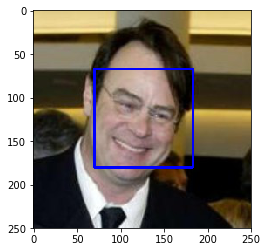

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
count_humans=0
for image in human_files_short:
    if face_detector(image):
        count_humans+=1
print('Detected {}% humans in human_files'.format(count_humans))
count_humans=0
for image in dog_files_short:
    if face_detector(image):
        count_humans+=1
print('Detected {}% humans in dog_files'.format(count_humans))


Detected 98% humans in human_files
Detected 17% humans in dog_files


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [3]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

##I really tried to find some alternative to OpenCV.\
## The only simple pretrained model I found was dlib but the package is not installed in the workspace\
##and when I tried to install it with !pip.it got stuck when importing it building the setup wheel \
## Thought about doing a CNN network to detect humans, started building my own dataset of humans and non-humans,\
## and realised that I'm creating a project within a project that will take me as much time and cells\
## as the Dog project itself so I'm putting this optional aside.\
## Wondering what did you have in mind besides OpenCV?\

#!pip install cmake
#!pip install dlib
#import sys
#import dlib


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [9]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:06<00:00, 81067854.17it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

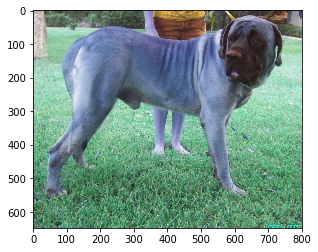

The VGG!6 pretrained label prediction for the dog image is bull mastiff


In [31]:
from PIL import Image
import torchvision.transforms as transforms
import requests
from torch.autograd import Variable
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    VGG16.eval() 
    transform_img = transforms.Compose([transforms.Resize(256),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])])
    dog = cv2.imread(img_path)
    plt.imshow(dog)
    plt.show()
    image=Image.open(img_path)
    
    image=transform_img(image)
    image.unsqueeze_(0)
    image=Variable(image)
    prediction=VGG16(image)
    #prediction = prediction.data.numpy().argmax()
    return labels[prediction.data.numpy().argmax()]
    #print(prediction)
    
    

labels='https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
response = requests.get(labels)
labels = {int(key): value for key, value in response.json().items()}
print('The VGG16 pretrained label prediction for the dog image is {}'.format(VGG16_predict(dog_files[0])))

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [62]:
### returns "True" if a dog is detected in the image stored at img_path

def dog_detector(img_path):

    VGG16.eval() 
    transform_img = transforms.Compose([transforms.Resize(256),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])])
    image=Image.open(img_path)
    image=transform_img(image)
    image.unsqueeze_(0)
    image=Variable(image)
    prediction=VGG16(image)
    dog_predict = prediction.data.numpy().argmax()
    if dog_predict>=151 and dog_predict<=268:
        return True
    else:
        return False
    #return prediction.data.numpy().argmax()
    #return labels[prediction.data.numpy().argmax()]

if dog_detector(dog_files[0]):
    print('Dog Detected!!!')
else:
    print('No dog detected :(')

Dog Detected!!!


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [38]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

count_dogs=0
for image in human_files_short:
    if dog_detector(image):
        count_dogs+=1
print('Detected {}% dogs in human_files'.format(count_dogs))
count_dogs=0
for image in dog_files_short:
    if dog_detector(image):
        count_dogs+=1
print('Detected {}% dogs in dog_files'.format(count_dogs))

Detected 0% dogs in human_files
Detected 100% dogs in dog_files


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
import torch
import torchvision.models as models

resnet50 = models.resnet50(pretrained=True)

use_cuda = torch.cuda.is_available()

if use_cuda:
    resnet50 = resnet50.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:04<00:00, 21171172.91it/s]


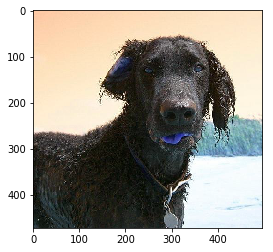

The Resnet50 pretrained label prediction for the dog image is curly-coated retriever


In [17]:
from PIL import Image
import torchvision.transforms as transforms
import requests
from torch.autograd import Variable

def resnet50_dog_predict(img_path):    
    resnet50.eval() 
    transform_img = transforms.Compose([transforms.Resize(256),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])])
    dog = cv2.imread(img_path)
    plt.imshow(dog)
    plt.show()
    image=Image.open(img_path)
    
    image=transform_img(image)
    image.unsqueeze_(0)
    image=Variable(image)
    prediction=resnet50(image)
    #prediction = prediction.data.numpy().argmax()
    return labels[prediction.data.numpy().argmax()]
    #print(prediction)
    
    

labels='https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
response = requests.get(labels)
labels = {int(key): value for key, value in response.json().items()}
print('The Resnet50 pretrained label prediction for the dog image is {}'.format(resnet50_dog_predict(dog_files[140])))

In [19]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

def dog_resnet_detector(img_path):

    resnet50.eval() 
    transform_img = transforms.Compose([transforms.Resize(256),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])])
    image=Image.open(img_path)
    image=transform_img(image)
    image.unsqueeze_(0)
    image=Variable(image)
    prediction=resnet50(image)
    resnet50_predict = prediction.data.numpy().argmax()
    if resnet50_predict>=151 and resnet50_predict<=268:
        return True
    else:
        return False

print('Using Resnet50 pretrained model:')
print('')
count_dogs=0
for image in human_files_short:
    if dog_resnet_detector(image):
        count_dogs+=1
print('Detected {}% dogs in human_files'.format(count_dogs))
count_dogs=0
for image in dog_files_short:
    if dog_resnet_detector(image):
        count_dogs+=1
print('Detected {}% dogs in dog_files'.format(count_dogs))

Using Resnet50 pretrained model:

Detected 0% dogs in human_files
Detected 100% dogs in dog_files


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [3]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_dir = '/data/dog_images'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'


In [4]:
import requests

labels='https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
response = requests.get(labels)
names = {int(key): value for key, value in response.json().items()}
classes=list(names.values())
print(classes[151:268])

['Chihuahua', 'Japanese spaniel', 'Maltese dog, Maltese terrier, Maltese', 'Pekinese, Pekingese, Peke', 'Shih-Tzu', 'Blenheim spaniel', 'papillon', 'toy terrier', 'Rhodesian ridgeback', 'Afghan hound, Afghan', 'basset, basset hound', 'beagle', 'bloodhound, sleuthhound', 'bluetick', 'black-and-tan coonhound', 'Walker hound, Walker foxhound', 'English foxhound', 'redbone', 'borzoi, Russian wolfhound', 'Irish wolfhound', 'Italian greyhound', 'whippet', 'Ibizan hound, Ibizan Podenco', 'Norwegian elkhound, elkhound', 'otterhound, otter hound', 'Saluki, gazelle hound', 'Scottish deerhound, deerhound', 'Weimaraner', 'Staffordshire bullterrier, Staffordshire bull terrier', 'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier', 'Bedlington terrier', 'Border terrier', 'Kerry blue terrier', 'Irish terrier', 'Norfolk terrier', 'Norwich terrier', 'Yorkshire terrier', 'wire-haired fox terrier', 'Lakeland terrier', 'Sealyham terrier, Sealyham', 'Airedale

In [5]:
from torchvision import datasets
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch
import torchvision.models as models
import matplotlib.pyplot as plt

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(225),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    'valid': transforms.Compose([
        transforms.Resize(225),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    'test': transforms.Compose([
        transforms.Resize(225),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ])
        }

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'valid','test']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=20,
                                            shuffle=True)
                       for x in ['train', 'valid','test']}

#train_loader=torch.utils.data.DataLoader(image_datasets['train'], batch_size=20,shuffle=True)
#valid_loader=torch.utils.data.DataLoader(image_datasets['valid'], batch_size=20, shuffle=True)
#test_loader=torch.utils.data.DataLoader(image_datasets['test'], batch_size=20)

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid','test']}
class_names = image_datasets['train'].classes


print(len(class_names))


133


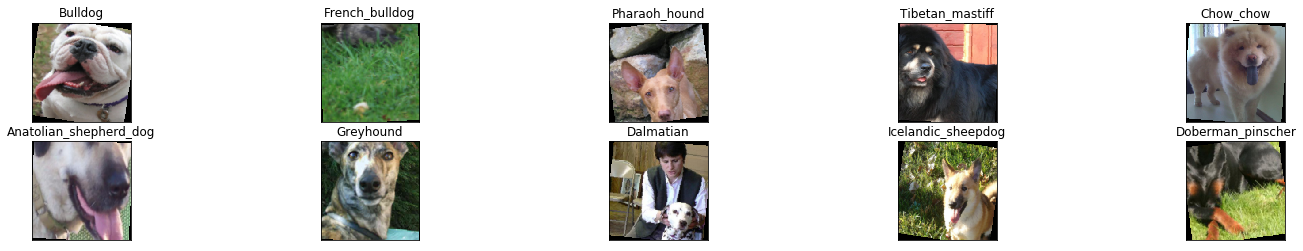

In [6]:

def imshow(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)    
    plt.imshow(inp)


images, classes = next(iter(dataloaders['train']))
      
fig = plt.figure(figsize=(25,4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(class_names[classes[idx]].split(".")[1])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
My code calls for random horizontal flipping, random cropping and random rotation on the training dataset so the learning rate would be higher for the testing. The size of the input tensor is (3,224). It is an RGB image and the size of 224X224 after resizing and cropping because some of the dogs's images are big (compared to the 32X32 of CIFAR)

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [7]:
import torch.nn as nn
import torch.nn.functional as F
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from torch.optim import lr_scheduler

use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # convolutional layer
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.conv1_bn = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16,32,3)
        self.conv2_bn = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32,64,3)        
        self.conv3_bn = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64,128,3)
        self.conv4_bn = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128,256,3)
        self.conv5_bn = nn.BatchNorm2d(256)
                  
        self.fc1 = nn.Linear(256 * 5 * 5, 1024)
        self.fc2 = nn.Linear(1024, 133)

        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5) 
    
    def forward(self, x):
        ## Define forward behavior
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.conv1_bn(x)
        #print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.conv2_bn(x)
        #print(x.shape)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.conv3_bn(x)
        #print(x.shape)
        x = self.pool(F.relu(self.conv4(x)))
        x = self.conv4_bn(x)
        #print(x.shape)
        x = self.pool(F.relu(self.conv5(x)))
        x = self.conv5_bn(x)
        #print(x.shape)

                
        x = x.view(-1, 256 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv5_bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=6400, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=133, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (d

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
 I created first a  simple CNN with 3 layers with 0 padding, a stride of 1, max pool of 2X2 and a dropout of 0.5 with two fully connected layers with 133 output as number of dog classes in labels. The first problem I had was with flattening the vector (x.view) in the forward. The matrices didn't fit but I saw a tip from one of the mentors in the chatroom to print the shape of the vector in each step and that helped my calculations.
The second problem I had was was with getting very low accuracy during the training stage.I read another tip from the mentor answering someone else with a similar problem to use BatchNorm2d after max pooling. I added to more convolutional layers, max pooled and batch normed each one of them. Leaving my two fully connected layers, I managed to get a high training using only 10 epochs

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [8]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(),lr=0.01)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_scratch, step_size=7, gamma=0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [9]:
import time 
import copy

def train(n_epochs, loaders, model, optimizer, criterion,lr_scheduler, use_cuda):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    valid_loss_min = np.Inf 

    for epoch in range(n_epochs):
        print('Epoch {}/{}'.format(epoch, n_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                lr_scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            valid_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                if use_cuda:
                    inputs, labels = inputs.cuda(), labels.cuda()

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            

                

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            print()
            

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                epoch_loss))
                valid_loss_min=epoch_loss
                print()


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


# train the model
model_scratch = train(10, dataloaders, model_scratch, optimizer_scratch,
                      criterion_scratch, exp_lr_scheduler,use_cuda)

# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch 0/9
----------
train Loss: 4.7637 Acc: 0.0286

valid Loss: 4.5593 Acc: 0.0443

Validation loss decreased (inf --> 4.559339).  Saving model ...

Epoch 1/9
----------
train Loss: 4.5614 Acc: 0.0383

valid Loss: 4.3712 Acc: 0.0695

Validation loss decreased (4.559339 --> 4.371202).  Saving model ...

Epoch 2/9
----------
train Loss: 4.4292 Acc: 0.0548

valid Loss: 4.2228 Acc: 0.0635

Epoch 3/9
----------
train Loss: 4.3212 Acc: 0.0629

valid Loss: 4.1263 Acc: 0.0731

Validation loss decreased (4.371202 --> 4.126264).  Saving model ...

Epoch 4/9
----------
train Loss: 4.2393 Acc: 0.0666

valid Loss: 4.0085 Acc: 0.0958

Validation loss decreased (4.126264 --> 4.008467).  Saving model ...

Epoch 5/9
----------
train Loss: 4.1596 Acc: 0.0780

valid Loss: 3.9840 Acc: 0.0874

Epoch 6/9
----------
train Loss: 4.0823 Acc: 0.0841

valid Loss: 3.9272 Acc: 0.0994

Validation loss decreased (4.008467 --> 3.927150).  Saving model ...

Epoch 7/9
----------
train Loss: 3.9672 Acc: 0.1061

valid L

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [10]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(dataloaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.738465


Test Accuracy: 13% (112/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [4]:

from torchvision import datasets
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch
import torchvision.models as models
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_dir = '/data/dog_images'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(225),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    'valid': transforms.Compose([
        transforms.Resize(225),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    'test': transforms.Compose([
        transforms.Resize(225),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ])
        }

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'valid','test']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=20,
                                            shuffle=True)
                       for x in ['train', 'valid','test']}

#train_loader=torch.utils.data.DataLoader(image_datasets['train'], batch_size=20,shuffle=True)
#valid_loader=torch.utils.data.DataLoader(image_datasets['valid'], batch_size=20, shuffle=True)
#test_loader=torch.utils.data.DataLoader(image_datasets['test'], batch_size=20)

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid','test']}
class_names = image_datasets['train'].classes


print(len(class_names))


133


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [5]:
import torchvision.models as models
import torch.nn as nn
import torch

## TODO: Specify model architecture 

# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)

# print out the model structure
print(vgg16)



Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:19<00:00, 28098756.83it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [6]:
# Freeze training for all "features" layers
for param in vgg16.features.parameters():
    param.requires_grad = False

n_inputs = vgg16.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(class_names))
vgg16.classifier[6] = last_layer

# check to see that your last layer produces the expected number of outputs
print(vgg16.classifier[6])

use_cuda = torch.cuda.is_available()
if use_cuda:
    vgg16 = vgg16.cuda()



Linear(in_features=4096, out_features=133, bias=True)


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I chose VGG16 which looks like a big and powerful pretrained model. It is s already trained on Imagenet so it must be good with images :) The only thing I changed was the out features of the last fully connected layer to the number of the dog classes/breeds. All the other layers I froze and I'm about to train it for 6 epochs. Got 80% in the testing of the model. Very pleased :)


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [7]:
import torch.optim as optim
from torch.optim import lr_scheduler

### TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_transfer = optim.SGD(vgg16.classifier.parameters(), lr=0.001)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_transfer, step_size=7, gamma=0.1)

In [8]:
model_transfer=vgg16

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [23]:
# train the model
import time 
import copy

def train(n_epochs, loaders, model, optimizer, criterion,lr_scheduler, use_cuda):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    valid_loss_min = np.Inf 

    for epoch in range(n_epochs):
        print('Epoch {}/{}'.format(epoch, n_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                lr_scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            valid_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                if use_cuda:
                    inputs, labels = inputs.cuda(), labels.cuda()

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            

                

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            print()
            

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(),'model_transfer.pt')
                best_model_wts = copy.deepcopy(model.state_dict())
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                epoch_loss))
                valid_loss_min=epoch_loss
                print()


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model




# train the model

n_epochs=6

model_transfer = train(n_epochs, dataloaders, vgg16, optimizer_transfer, criterion_transfer,exp_lr_scheduler,use_cuda)


Epoch 0/5
----------
train Loss: 4.4765 Acc: 0.0964

valid Loss: 3.2578 Acc: 0.5018

Validation loss decreased (inf --> 3.257799).  Saving model ...

Epoch 1/5
----------
train Loss: 3.2036 Acc: 0.3476

valid Loss: 1.6178 Acc: 0.6683

Validation loss decreased (3.257799 --> 1.617756).  Saving model ...

Epoch 2/5
----------
train Loss: 2.2801 Acc: 0.4696

valid Loss: 0.9589 Acc: 0.7461

Validation loss decreased (1.617756 --> 0.958914).  Saving model ...

Epoch 3/5
----------
train Loss: 1.8290 Acc: 0.5331

valid Loss: 0.7436 Acc: 0.7820

Validation loss decreased (0.958914 --> 0.743618).  Saving model ...

Epoch 4/5
----------
train Loss: 1.6337 Acc: 0.5684

valid Loss: 0.6204 Acc: 0.8192

Validation loss decreased (0.743618 --> 0.620403).  Saving model ...

Epoch 5/5
----------
train Loss: 1.5476 Acc: 0.5912

valid Loss: 0.5642 Acc: 0.8275

Validation loss decreased (0.620403 --> 0.564171).  Saving model ...

Training complete in 27m 36s
Best val Acc: 0.827545


In [9]:

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location=lambda storage, loc: storage))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [10]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
test(dataloaders, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.594380


Test Accuracy: 80% (677/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

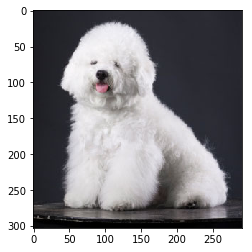

The VGG16 pretrained label prediction for the dog image is Bichon frise


In [34]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
import requests
from torch.autograd import Variable
from PIL import Image


def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    model_transfer.eval() 
    transform_img = transforms.Compose([transforms.Resize(256),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])])
    

    image=Image.open(img_path)
    image=transform_img(image)
    #plt.imshow(image)
    #plt.show()
    image.unsqueeze_(0)
    image=Variable(image)
    if use_cuda:
        image=image.cuda()
    prediction=model_transfer(image)
    #else:
    #    prediction=model_transfer(image)
    
    index=prediction.data.cpu().numpy().argmax()
        

    return labels[index]
    
img_path=dog_files[240] 
image=Image.open(img_path)
plt.imshow(image)
plt.show()

labels = [item[4:].replace("_", " ") for item in image_datasets['train'].classes]

print('The VGG16 pretrained label prediction for the dog image is {}'.format(predict_breed_transfer(img_path)))
    
    
#dataiter = iter(dataloaders[test])
#images, labels = dataiter.next()
#labels='https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
#response = requests.get(labels)
#labels = {int(key): value for key, value in response.json().items()}


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

Number of faces detected: 1


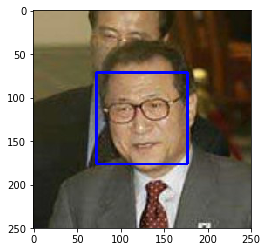

In [25]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

def human_show(img_path):
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    #print('Number of faces detected:', len(faces))
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

human_show(human_files[10])

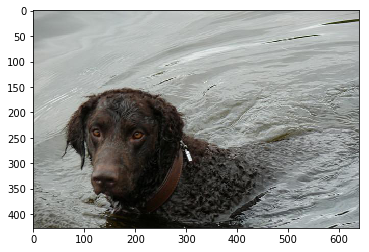

It is a dog and the breed is Curly-coated retriever

Number of faces detected: 1


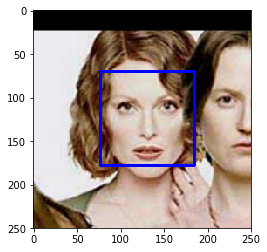

You look like a... English springer spaniel


In [40]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    if face_detector(img_path)>0:
        human_show(img_path)
        print('You look like a... {}'.format(predict_breed_transfer(img_path)))
    else:
        if predict_breed_transfer(img_path):
            image=Image.open(img_path)
            plt.imshow(image)
            plt.show()
            print('It is a dog and the breed is {}'.format(predict_breed_transfer(img_path)))
        else:
            print('Error! No dogs or humans!')
            
    ## handle cases for a human face, dog, and neither
    
run_app(dog_files[120])
print()
run_app(human_files[40])

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
The dog prediction is excellent. I tested a few images of dogs and it predicted qucikly all their breeds correctly (in one Shar-Pei dog image it recognized a human face :) but still said that the human looks like a Shar-Pei).
I think that after saving the pre-trained model after training it fully connected layers for 6 epochs, I can load and run it very fast. I used GPU only for the training but later CPU for testing and predicting and the prediction runs very fast: 2-3 seconds for an image to transform it, run prediction and show the output.
Three things to improve:
1. I only tested on high resolution images with good features of the dogs and not on blurry low resolution images so there's a long way to optimize and train to make it perfect
2. I tested only one model (vgg16) and got good results pretty quick but it would be intersting to see if there are algorithms who can get better results.  
3. There are many ways to make it more interesting: Building a website with the algorithm to let people test their images and see which dog they resemble, using some kind of style transfer algorithm to mix your image with the dog you resemble and with GAN (waiting to get to that chapter) create from scratch more dogs or humans like the image tested.

In [57]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
test_files = np.array(glob("images/*"))
print(test_files)
#run_app(test_files['str.jpg'])


['images/Labrador_retriever_06449.jpg' 'images/shrpi.jpg'
 'images/Curly-coated_retriever_03896.jpg' 'images/sample_dog_output.png'
 'images/Labrador_retriever_06455.jpg' 'images/Brittany_02625.jpg'
 'images/Labrador_retriever_06457.jpg' 'images/sample_cnn.png'
 'images/amiti.jpg' 'images/bibi.jpg'
 'images/Welsh_springer_spaniel_08203.jpg' 'images/gantz.jpg'
 'images/me.jpg' 'images/American_water_spaniel_00648.jpg'
 'images/ecspaniel.jpg' 'images/str.jpg' 'images/sample_human_output.png']


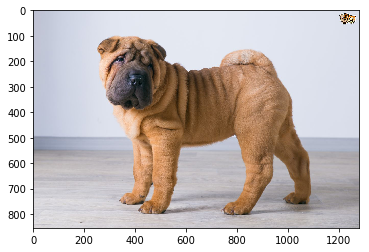

It is a dog and the breed is Chinese shar-pei



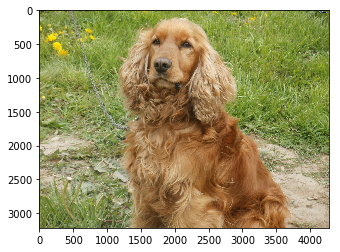

It is a dog and the breed is English cocker spaniel



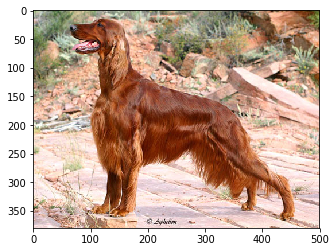

It is a dog and the breed is Irish setter



In [56]:
run_app(test_files[1])
print()
run_app(test_files[13])
print()
run_app(test_files[14])
print()

Number of faces detected: 1


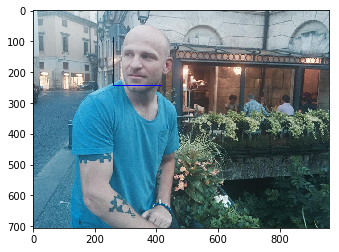

You look like a... Chinese shar-pei

Number of faces detected: 1


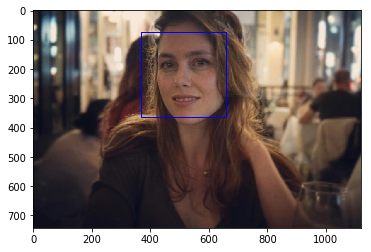

You look like a... Afghan hound

Number of faces detected: 1


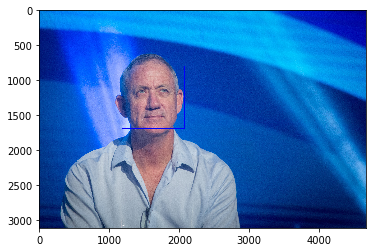

You look like a... Ibizan hound



In [55]:
run_app(test_files[11])
print()
run_app(test_files[8])
print()
run_app(test_files[10])
print()